El objetivo de esta práctica es cargar y limpiar varias fuentes de datos, transformarlas cuando sea necesario y combinarlas en un único dataframe para poder analizarlas de forma conjunta, es decir, la **etapa ETL de un sistema de Minado de datos**.

En concreto, vamos a combinar información geográfica acerca de los distritos de la ciudad de Málaga junto con un dataset de incidencias del Ayuntamiento que indica en qué calle y cuando se han producido y cuando se han resuelto, así como información acerca de las mismas. El primer archivo nos permitirá ubicar las incidencias del segundo por distritos y representar toda esta información sobre un mapa. Así podríamos analizar, por ejemplo, qué tipo de incidencia se produce más en cada distrito, si se solucionan antes en unos distritos que en otros, cuánta gente se ve afectada por las mismas, etc. Un ejemplo de análisis se muestra en la figura a continuación:

![](https://drive.google.com/uc?export=view&id=1GfnvczRp2L5276lvJn7lD9_UBbpHRcF8)


NOTA: *La primera parte de esta práctica es completamente guiada, ésto es, no tendréis que añadir código. A partir de cierto punto, que se os indica en el guión, debéis añadir lo necesario para completarla.*



---

Como trabajamos con un fichero grande de incidencias, vamos a predescargar los datos en Colab usando gdown y los cargaremos luego con pandas y geospandas en los dataframes DistritosMalaga e incidencias respectivamente.

CONSEJO: gdown carga temporalmente los archivos en un directorio en Colab. Si trabajáis en local, basta con que los descarguéis del campus virtual en vuestro directorio de trabajo.

In [ ]:
!gdown --id 16kcIKDXnHwFkFYBuadiJ6cHVzQjXsPtc
!gdown 'https://drive.google.com/uc?id=146bzreg7R5xH6wCau0EjaxsPvL-UU5mL'

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=16kcIKDXnHwFkFYBuadiJ6cHVzQjXsPtc
To: /content/Distritos_MalagaUrbano.geojson
100% 556k/556k [00:00<00:00, 71.0MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=146bzreg7R5xH6wCau0EjaxsPvL-UU5mL
From (redirected): https://drive.google.com/uc?id=146bzreg7R5xH6wCau0EjaxsPvL-UU5mL&confirm=t&uuid=939b7d4b-3deb-4281-b84e-37cb7e3b317d
To: /content/incidenciasMalaga2018.csv
100% 737M/737M [00:07<00:00, 98.5MB/s]


Comenzaremos cargando un fichero con información geográfica de los distritos de Málaga capital en formato geojson. En concreto, los Distritos de Málaga capital, con descriptores de población y área y los contornos en formato multipolígono. Estos contornos componen una figura como la que se muestra a continuación:

![](https://drive.google.com/uc?export=view&id=1Glnr389iSDx7MWnsR-WprSUBOK8A3HfR)


In [ ]:
import geopandas as gpd

# Cargar el archivo GeoJSON en un DataFrame GeoPandas
DistritosMalaga = gpd.read_file('Distritos_MalagaUrbano.geojson')

# Mostrar las primeras filas del DataFrame GeoPandas
print(DistritosMalaga.head())

              Distrito  Superf_Km2  Poblacion       Hab_Km2     SUPERF_M2  \
0   PUERTO DE LA TORRE    5.629615    34883.0   6196.338807  5.629615e+06   
1       PALMA-PALMILLA    1.867407    26286.0  14076.203610  1.867407e+06   
2                 ESTE   14.279899    55473.0   3884.691468  1.427990e+07   
3  CRUZ DE HUMILLADERO   10.282378    88996.0   8655.196051  1.028238e+07   
4        CIUDAD JARDIN    4.440193    38602.0   8693.765875  4.440193e+06   

                                            geometry  
0  MULTIPOLYGON Z (((-4.49749 36.76300 0.00000, -...  
1  MULTIPOLYGON Z (((-4.42771 36.75428 0.00000, -...  
2  MULTIPOLYGON Z (((-4.32005 36.77239 0.00000, -...  
3  POLYGON Z ((-4.43262 36.72141 0.00000, -4.4326...  
4  MULTIPOLYGON Z (((-4.42582 36.77296 0.00000, -...  


Este archivo nos devuelve un dataframe con varios campos para cada uno de los 11 Distritos de la ciudad:

*   Distrito : (Factor): Nombres de los distritos
*   Superf_Km2: (num)
*   Poblacion: (num)
*   Hab_Km2: (num)
*   SUPERF_M2: (num)
*   geometry: líneas poligonales que permiten delimitar el contorno de los distritos

No vamos a entrar en la estructura de geometry, simplemente indicar que podemos emplear los multipolígonos para dibujar el mapa de la ciudad. Observe que se dibuja únicamente la información de los contornos, pero sobre un sistema de coordenadas geográfico (ver X,Y). Más adelante explicaremos como representar más información sobre este mapa y cómo combinarlo con mapas de otro tipo alineando los sistemas de referencia geográfica.

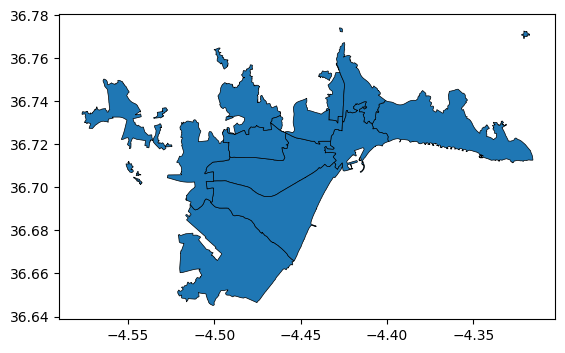

In [ ]:
import matplotlib.pyplot as plt

# Dibujar los distritos de Málaga
DistritosMalaga.plot(edgecolor='black', linewidth=0.5)

# Mostrar el gráfico
plt.show()

A continuación cargamos un archivo con todas las incidencias de la ciudad de Málaga en 2018. Este archivo está originalmente alojado en el repositorio de datos abiertos del Ayuntamiento, pero hemos descargado y filtrado una copia para evitar sensibilidad de la práctica a cambios de formato.

In [ ]:
import pandas as pd

# Ruta al archivo CSV en el entorno de Colab, tras usar Gdown
csv_path = '/content/incidenciasMalaga2018.csv'

# Cargar el archivo CSV en un DataFrame de Pandas
incidencias = pd.read_csv(csv_path)


print(incidencias.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30488 entries, 0 to 30487
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   _id               30488 non-null  int64  
 1   CODIGO            30488 non-null  object 
 2   FECHA_REGISTRO    30488 non-null  object 
 3   FECHA_RESOLUCION  30488 non-null  object 
 4   PRIORIDAD         30488 non-null  object 
 5   DIRECCION         30488 non-null  object 
 6   LATITUD           30488 non-null  float64
 7   LONGITUD          30488 non-null  float64
 8   TIPO              30488 non-null  object 
 9   RESPONSABLE       30488 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.3+ MB
None


Analizando dicha estructura, podemos ver que contiene 30488 entradas, con 10 variables cada una:

*   X_id : (int) identificador interno
*    CODIGO : (object) identificador interno
*    FECHA_REGISTRO : (object) Fecha en que se registra la incidencia
*    FECHA_RESOLUCION: (object) Fecha en que se resuelve la incidencia
*    PRIORIDAD : (object) Prioridad de incidencia
*    DIRECCION : (object) Dirección de la incidencia
*    LATITUD : (int) Latitud de la incidencia
*    LONGITUD : (int) Longitud de la incidencia
*    TIPO : (object) Tipo de incidencia (por ejemplo, suciedad en la acera o mobiliario urbano dañado)
*    RESPONSABLE : (object) Departamento responsable de la incidencia (por ejemplo, Parques y Jardines)

Es importante analizar y comprender la estructura de los datos para ver qué tipo de limpieza y transformación hay que llevar a cabo. En concreto, observamos:

1.   Muchos de los campos son cualitativos (tipo objeto), es decir, sólo pueden tomar un conjunto determinado de valores, representables por una etiqueta tipo string. Para muchas aplicaciones la información categorizable (discreta) nos favorece (por ejemplo, TIPO o RESPONSABLE), pero en algunos casos puede ser preferible tener un valor numérico, por ejemplo en el caso de Prioridad, donde existe una relación jeráquica entre los valores.
2.   Las fechas también están introducidas como objetos, es decir, cada fecha es una etiqueta distinta sin valor numérico. Para poder operar y extraer información como, por ejemplo, el tiempo de resolución de una incidencia necesitamos convertirlas a día/mes/año (enteros).

3.   No se especifica el sistema de coordenadas de latitud y longitud, lo que necesitamos para su correcta representación en un mapa.

Una vez cargados los datos vamos a proceder a su limpieza y transformación para prepararlos para el procesado. Este procedimiento, evidentemente, siempre depende del tipo de datos de entrada y el estado en que se encuentren.

En general, se suele incluir una fase para:
* Localizar datos erróneos y/o incompletos y arreglarlos/rellenar los huecos -si es posible- o eliminarlos.
* Si los dataframes empleados, en caso de haber más de uno, tienen campos comunes, transformarlos e integrarlos
* Recodificar las variables que necesitemos, por ejemplo, de objeto a numéricas.

Adicionalmente, hay pasos específicos que dependen totalmente de la información con que trabajamos en concreto, que se detallan a continuación. Todos estos pasos requieren un primer análisis de los dataframes de que disponemos para ver qué necesitamos hacer de acuerdo al objetivo que tenemos. En nuestro caso, nuestro objetivo es observar sobre un mapa de Málaga, el comportamiento de las incidencias de distinto tipo que se producen en la ciudad a lo largo de un año, así que necesitamos:
* Casar los mapas de la provincia con las coordenadas de las incidencias, asegurándonos de que tienen los mismos sistemas de coordenadas.

# Recodificación de prioridades
Vamos a comenzar tratando el problema más sencillo: las variables de prioridad son tipo objeto, pero guardan relación jerárquica entre ellas, así que las vamos a transformar en números. Dado que hay 4 prioridades, las asignaremos de de 1 a 4, donde la más baja es 1 y la más alta 4.

In [ ]:
print(incidencias['PRIORIDAD'].unique())

['Media                                             '
 'Urgente                                           '
 'Baja                                              '
 'Alta                                              ']


Podemos observar que las etiquetas están mal formateadas, ya que hay espacios en blanco detrás de cada una, pero no nos afecta para transformarlas en números, ya que podemos asignar cualquier cadena a un entero, como hacemos a continuación, asignando 1 a prioridad Baja y 4 a Urgente. Tiene sentido hacer esta sustitución y no algo tipo  codificación 1-hot porque, como hemos indicado, hay relación de jerarquía en los valores de estas variables (4>1).

In [ ]:
# Definir el mapeo de valores
mapeo_prioridad = {'Media                                             ': 2,
                   'Urgente                                           ': 4,
                   'Baja                                              ': 1,
                   'Alta                                              ': 3}

# Aplicar el mapeo a la columna "PRIORIDAD"
incidencias['PRIORIDAD'] = incidencias['PRIORIDAD'].replace(mapeo_prioridad)

# Mostrar el DataFrame con los valores numéricos en la columna "PRIORIDAD"
print(incidencias['PRIORIDAD'].head)


<bound method NDFrame.head of 0        2
1        2
2        2
3        2
4        2
        ..
30483    2
30484    2
30485    2
30486    2
30487    2
Name: PRIORIDAD, Length: 30488, dtype: int64>


# Transformación de fechas

También son etiquetas las fechas de inicio y fin de incidencia, que igualmente podemos codificar de forma numérica. Eso nos ayudaría, por ejemplo, a calcular la diferencia en días de una a otra o, lo que es lo mismo, el tiempo que tarda en resolverse una incidencia.

Si analizamos la información antes de procesarla, veremos el formato que presenta.

In [ ]:
print(incidencias['FECHA_REGISTRO'].head)

<bound method NDFrame.head of 0        2017-12-18T08:55:02
1        2017-12-18T08:58:06
2        2017-12-18T10:29:46
3        2017-12-18T10:31:17
4        2017-12-21T13:33:39
                ...         
30483    2018-12-21T16:00:48
30484    2018-12-21T17:15:08
30485    2018-12-21T18:07:16
30486    2018-12-21T19:31:38
30487    2018-12-21T19:40:36
Name: FECHA_REGISTRO, Length: 30488, dtype: object>


Dado que este formato de fechas es bastante estandar, pandas ya dispone de una función para convertir las etiquetas en números: to_datetime().
Adicionalmente, nosotros separaremos posteriormente las fechas en año, mes, día y día de la semana (que la librería calcula por nosotros, empezando en 0 (lunes) hasta 6 (domingo)) tanto para la fecha de registro como para la de resolución, para manejar luego esta información con mayor comodidad.

In [ ]:
# Convertir las columnas FECHA_REGISTRO y FECHA_RESOLUCION a objetos datetime
incidencias['FECHA_REGISTRO'] = pd.to_datetime(incidencias['FECHA_REGISTRO'])
incidencias['FECHA_RESOLUCION'] = pd.to_datetime(incidencias['FECHA_RESOLUCION'])

# Extraer año, mes, día y día de la semana para FECHA_REGISTRO
incidencias['year1'] = incidencias['FECHA_REGISTRO'].dt.year
incidencias['month1'] = incidencias['FECHA_REGISTRO'].dt.month
incidencias['day1'] = incidencias['FECHA_REGISTRO'].dt.day
incidencias['weekday1'] = incidencias['FECHA_REGISTRO'].dt.weekday  # 0: lunes, 1: martes, ..., 6: domingo

# Extraer año, mes, día y día de la semana para FECHA_RESOLUCION
incidencias['year2'] = incidencias['FECHA_RESOLUCION'].dt.year
incidencias['month2'] = incidencias['FECHA_RESOLUCION'].dt.month
incidencias['day2'] = incidencias['FECHA_RESOLUCION'].dt.day
incidencias['weekday2'] = incidencias['FECHA_RESOLUCION'].dt.weekday  # 0: lunes, 1: martes, ..., 6: domingo

Podemos comprobar que la transformación es correcta comparando, por ejemplo, algunas fechas de registro con las cuatro columnas correspondientes y comparándolo con los valores que tenían anteriormente.

In [ ]:
print(incidencias[['FECHA_REGISTRO', 'year1', 'month1', 'day1', 'weekday1']].head())


       FECHA_REGISTRO  year1  month1  day1  weekday1
0 2017-12-18 08:55:02   2017      12    18         0
1 2017-12-18 08:58:06   2017      12    18         0
2 2017-12-18 10:29:46   2017      12    18         0
3 2017-12-18 10:31:17   2017      12    18         0
4 2017-12-21 13:33:39   2017      12    21         3


Por interpretabilidad, podríamos cambiar los valores de weekday por sus etiquetas correspondientes usando, por ejemplo, un diccionario, pero en principio vamos a dejar los valores numéricos, que suelen ser más flexibles a la hora de aplicar algoritmos de minado de datos. Si en algún momento necesita hacerlo, descomente el código a continuación.

In [ ]:
# Diccionario de mapeo de números de día de la semana a nombres de días
#dias_semana = {0: 'lunes', 1: 'martes', 2: 'miércoles', 3: 'jueves', 4: 'viernes', 5: 'sábado', 6: 'domingo'}

# Aplicar el mapeo a las columnas weekday1 y weekday2
#incidencias['weekday1'] = incidencias['weekday1'].map(dias_semana)
#incidencias['weekday2'] = incidencias['weekday2'].map(dias_semana)

# Mostrar el DataFrame con las nuevas columnas mapeadas
#print(incidencias[['weekday1', 'weekday2']].head())

  weekday1 weekday2
0    lunes    lunes
1    lunes    lunes
2    lunes    lunes
3    lunes    lunes
4   jueves    lunes


Llegado este punto, podemos crear una columna nueva a la que denominaremos duracion_dias, que indique el tiempo de resolución en días de cada incidencia a partir de su fecha de registro y la de resolución. Si usamos las columnas originales transformadas, FECHA_RESOLUCION y FECHA_REGISTRO, solo es necesario restarlas.Comprobad un par de fechas para comprobar que los tiempos se calculan de forma correcta.

In [ ]:
# Calcular la duración en días de cada incidencia
incidencias['duracion_dias'] = (incidencias['FECHA_RESOLUCION'] - incidencias['FECHA_REGISTRO']).dt.days

# Mostrar un par de filas para comprobar los resultados
print(incidencias[['FECHA_REGISTRO', 'FECHA_RESOLUCION', 'duracion_dias']].head(2))

       FECHA_REGISTRO    FECHA_RESOLUCION  duracion_dias
0 2017-12-18 08:55:02 2018-01-01 23:01:34             14
1 2017-12-18 08:58:06 2018-01-01 23:01:35             14


Finalmente, eliminamos las dos columnas de fechas tipo objeto, que ya no hacen falta.

In [ ]:
# Eliminar las columnas originales FECHA_REGISTRO y FECHA_RESOLUCION
incidencias.drop(['FECHA_REGISTRO', 'FECHA_RESOLUCION'], axis=1, inplace=True)

# Mostrar el DataFrame con las nuevas columnas
print(incidencias)


         _id                                             CODIGO  PRIORIDAD  \
0          1  900-558188                                    ...          2   
1          2  900-558189                                    ...          2   
2          3  900-558246                                    ...          2   
3          4  900-558249                                    ...          2   
4          5  MASTL-558908                                  ...          2   
...      ...                                                ...        ...   
30483  30639  900-640093                                    ...          2   
30484  30640  900-640102                                    ...          2   
30485  30641  900-640104                                    ...          2   
30486  30642  900-640109                                    ...          2   
30487  30643  900-640110                                    ...          2   

                                               DIRECCION       

# Transformación de coordenadas

Nuestro siguiente problema es alinear los ejes de coordenadas de nuestro fichero de información geográfica de distritos con la latitud y longitud del fichero de incidencias.

Estudiar los sistemas de coordenadas geográficos y sus transformaciones podría llevarnos semanas, por lo que sólo vamos a entrar en lo estrictamente necesario. Existen dos problemas importantes a la hora de trabajar con sistemas de coordenadas:

*  Algunas librerías trabajan con formatos específicos y no admiten otros. Por  ejemplo, Google y los GPS trabajan con WGS84 (World Geodetic System), también identificado con el código EPSG 4326

*  Si se combina información de varios ficheros, todos tienen que compartir el mismo sistema de coordenadas o los datos no serán coherentes

*  A veces los datos no indican el sistema de coordenadas que emplean. De tener anotado el sistema, funciones como proj4string lo devuelve. Es el caso por ejemplo del geoJSON con el que trabajamos. Sin embargo, se puede observar que el dataframe incidencias no tiene información al respecto.


Evidentemente, si tenemos las coordenadas de una ubicación conocida, por ejemplo, Málaga, podemos buscar qué valores de coordenadas tendría en distintos ejes y, eventualmente, averiguar en cual se está trabajando, pero lamentablemente hay muchísimas opciones y el proceso suele resultar lento. Por otra parte, en España es muy usual trabajar en el sistema epsg:25830 (Europa), por lo que merece la pena comprobar ese el primero, junto con WGS84.  

Si comprobamos online Málaga en coordenadas **epsg:25830**, veremos que está en el margen de (4063500, 372000) en longitud/latitud, mientras que en WGS84 se encuentra en torno a (-4.50, 36,75) -nótese que mínimas variaciones en las coordenadas suponen enormes cambios de posición, esta aproximación es simplemente para determinar qué ejes de coordenadas se están empleando-. Si se comprueba el dataset de incidencias, es inmediato determinar que, por una parte, se están empleando coordenadas epsg:25830 y, por otra, salvo las 5 primeras entradas, en este dataset del Ayuntamiento de Málaga los datos tienen invertidas latitud y longitud. Esto puede corregirse eliminando las 5 primeras entradas e/o invirtiendo el resto, que es lo que hacemos a continuación.

Por otro lado, si observamos las coordenadas del modelo geojson (DistritosMalaga), vemos que se trabaja en **WGS84**.

In [ ]:
incidencias = incidencias.iloc[5:] #eliminar las primeras 5 filas
incidencias.rename(columns={'LONGITUD': 'lat', 'LATITUD': 'lng'}, inplace=True) #cambiar los nombres de LONGITUD y LATITUD

<ipython-input-11-87ef7a4a0b95>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incidencias.rename(columns={'LONGITUD': 'lat', 'LATITUD': 'lng'}, inplace=True) #cambiar los nombres de LONGITUD y LATITUD


Para representar las coordenadas en un mapa, y de paso comprobar que son correctas, esto es, que todos los puntos están en el el entorno de Málaga capital, podemos usar Folium, un wrapper de la librería Leaflet para Python.



In [ ]:
!pip install geopandas folium

Primero deberemos cambiar las coordenadas del dataframe incidencias al sistema que emplea Folium, que es WGS84 (el mismo que DistritosMalaga).

In [ ]:
import folium

# Crea un GeoDataFrame a partir del DataFrame existente
gdf = gpd.GeoDataFrame(incidencias, geometry=gpd.points_from_xy(incidencias['lng'], incidencias['lat']), crs='EPSG:25830')

# Convierte las coordenadas a EPSG:4326, que es lo mismo que WGS84
gdf = gdf.to_crs(epsg=4326)


Tras transformar las coordenadas, pintaremos las primeras 100 filas (para ahorrar tiempo de proceso) sobre un mapa para comprobar que se corresponden a Málaga. El código a continuación simplemente genera un mapa centrado en el punto medio de las coordenadas de latitud y longitud de nuestro gdf y luego agrega marcadores al mapa uno a uno. Nótese que estamos creando la estructura, pero aún no la hemos representado.

In [ ]:
# Obtener las 100 primeras filas del GeoDataFrame
gdf_100 = gdf.head(100)

# Crear un mapa centrado en la primera coordenada con zoom inicial 12
m = folium.Map(location=[gdf_100.geometry.y.mean(), gdf_100.geometry.x.mean()], zoom_start=12)

# Agregar los puntos al mapa
for _, row in gdf_100.iterrows():
    folium.Marker(location=[row.geometry.y, row.geometry.x]).add_to(m)

Finalmente, antes de visualizar el mapa, como tenemos DistritosMalaga en el mismo sistema de coordenadas, es sencillo dibujar los contornos de los distritos sobre el mapa e incluso añadir información de color de acuerdo a alguna de las variables que acompañan los contornos, por ejemplo, en el caso de abajo densidad de población (Hab_Km2).

Le añadimos control de capas (folium.LayerControl().add_to(m)) para mostrar u ocultar la capa de distritos según deseemos.

In [ ]:
# Añadir los polígonos coloreados al mapa
folium.Choropleth(
    geo_data=DistritosMalaga,
    name='choropleth',
    data=DistritosMalaga,
    columns=['Distrito', 'Hab_Km2'],
    key_on='feature.properties.Distrito',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Habitantes por Km²'
).add_to(m)

# Añadir control de capas para mostrar/ocultar
folium.LayerControl().add_to(m)

# Guardar el mapa en un archivo HTML
m.save('map.html')

# Mostrar el mapa en el notebook
m

# Representación y análisis visual

Finalmente, vamos a representar sobre un mapa la información que tenemos hasta este momento y a hacer un análisis muy preliminar de la situación concreta, previo al procesado de datos. Note que hasta este momento la práctica ha ido totalmente guiada, pero a partir de este punto tendrá que llevar a cabo sus propias operaciones sobre los datos y representar la información que elija para completar la entrega. Por si ha tenido algún problema con la carga y ETL de los datos, puede descargarse el dataframe ya procesado del CV: incidenciasProcesadas.rds (que debería coincidir con el que ha preprocesado hasta ahora).  

En concreto, vamos  a ceñirnos a las incidencias DECLARADAS en el año 2018 en el fichero de incidencias (algunas se declararon en 2017, pero se resolvieron en 2018).




In [ ]:
# Filtrar el DataFrame para seleccionar solo las filas donde Year1 es igual a 2018
incidencias2018 = incidencias[incidencias['year1'] == 2018]


MUY IMPORTANTE: Hasta aquí, en Colab hemos trabajado con sólo 100 incidencias, ya que el tamaño del df es muy grande y suele requerir mucho tiempo su representación online, pero la práctica **debe efectuarse** con el df incidencias2018 **completo**, para lo que se recomienda **descargar y trabajar en local**.


---

# Práctica a entregar

Los **objetivos concretos** de esta práctica son, en orden:
0.   Plantearse alguna cuestión concreta que pueda resolver comprobando simultáneamente variables del dataset junto con información geográfica. Por ejemplo ¿Tardan más las indicencias de tipo urgente en resolverse en el centro o en la periferia? ¿Se producen más incidencias de plagas en los distritos con más población por km2? ¿con qué frecuencia aparecen incidencias urgentes por cada distrito? ...
1.   Escoger el subgrupo de datos concretos (por ejemplo, incidencias de un tipo determinado, de un departamento determinado, de una prioridad determinada...) que necesita para resolver su pregunta
2.   Representar su evolución en video a lo largo de un año (es decir, representar un mapa por día de 2018, con las las incidencias activas dicho día y unir los 365 mapas en un video). Es importante decidir cómo visualizar la información que desea. Puede emplear color (de zona de mapa y marcador), tipo de marcador (área y tamaño), transparencia ... Recuerde etiquetar el código que emplee en algún punto concreto de la pantalla (leyenda)
3.  Extraer conclusión cualitativa acerca de lo que ve, ésto es, responder la pregunta que se planteó en un principio. Por ejemplo, podemos escoger las incidencias de basura en la via pública, representar donde aparecen y su duración en el tiempo e intentar determinar si en algunas zonas de la ciudad hay más basura que en otras y si se resuelven antes las incidencias en el centro o en la periferia.

Puede emplear, si lo desea, información acerca de los distritos a partir del archivo geoJSON, ya que llegado este punto debería tener anotado el distrito de cada incidencia en el dataframe. Note en ese caso que algunas incidencias no tienen información de distrito, así que debería eliminarlas de su análisis si escoge hacer algo con estos datos.

# Consideraciones acerca del video

Dado que tiene que compilar un video de incidencias de un año entero, para cada mapa diario debería trabajar únicamente, con la información de incidencias activas ese día en concreto, aunque puede representar la persistencia del tiempo de las mismas en función de la diferencia entre el día actual y el día en que se declaró cada una, por ejemplo, con el tamaño o el color del marcador.

NOTA: *Si va a representar una variable tipo objeto con distintas formas o colores, tenga en cuenta que dispone de un rango limitado antes de perder diferenciación visual, ésto es, asegúrese de que el margen de variación de dicha variable está acotado a un número reducido de segmentos. Para variables con mucha variación, emplee mejor algo como tamaño del marcador o transparencia del mismo, que se comporta de forma continua.*

Para saber qué incidencias hay activas en un día determinado, basta con comprobar si su fecha de cierre es posterior al mismo. Cuando vaya a dibujar el mapa del día i, sólo debe quedarse con el subconjunto de datos de incidencias2018 cuya fecha de inicio sea menor que i y su fecha de cierre sea mayor que i, es decir, que esté aún abierta el día i.

Una vez concluya la práctica, debe completar un cuestionario (ver CV) y subir a la tarea correspondiente los siguientes archivos: i) su código; y ii) el video resultante o un enlace al mismo. El video/mapa debe ser lo más autoexplicativo posible. **Debe incluir un título indicando qué representa el mapa y una leyenda de colo/forma en cada mapa, así como la fecha en cada fotograma**



---

# Código que podéis probar antes de empezar

Asumiendo que a partir del ejemplo ya mostrado sabéis: 1) representar los distritos en distinto color dependiento del valor de una variable; y 2) posicionar marcadores en puntos concretos, ahora podéis testear:

*    Representación por grupos de marcadores en Folium. Sirve para agrupar marcadores en caso de que el factor de zoom sea pequeño. Se basa en usar MarkerCluster para crear una capa de clusters en el mapa

In [ ]:
from folium.plugins import MarkerCluster
#PROBAD AQUI VUESTRO PROPIO CODIGO

*  Cambiar el icono y color del marcador por defecto.

In [ ]:
#PROBAD AQUI VUESTRO PROPIO CODIGO
folium.Marker(
    location=[row.geometry.y, row.geometry.x],
    popup='Icono con nube',
    icon=folium.Icon(icon='cloud')
).add_to(m)

folium.Marker(
    location=[row.geometry.y, row.geometry.x],
    popup='Marcador verde',
    icon=folium.Icon(color='green')
).add_to(m)

folium.Marker(
    location=[row.geometry.y, row.geometry.x],
    popup='Icono info rojo',
    icon=folium.Icon(color='red', icon='info-sign')
).add_to(m)

* Cambiar el tipo, color o tamaño de un marcador según el valor de una variable del dataframe.

In [ ]:
# Agregar los puntos al mapa con el color y radio correspondiente
#PROBAD AQUI VUESTRO PROPIO CODIGO
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=radius,
        color=color,
        fill=True,
        fill_color=color
    ).add_to(m)

* Añadir una leyenda al mapa. Hay varias formas dependiendo de lo que se quiera representar, así que se deja a vuestro criterio la prueba

In [ ]:
#PROBAD AQUI VUESTRO PROPIO CODIGO

* Exportar un mapa de un dia a archivo

In [ ]:
#PROBAD AQUI VUESTRO PROPIO CODIGO
import io
from PIL import Image

img_data = m._to_png(5)
img = Image.open(io.BytesIO(img_data))
img.save('image.png')

Finalmente, podéis usar cualquier programa de video para unir todas las imágenes como fotogramas. Aseguráos de que las escalas y localizaciones sean equivalentes, para que no haya excesivos saltos de mapa entre fotograma.